In [301]:
from nba_api.stats.endpoints import shotchartdetail
import json
import requests
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from nba_api.stats.static.players import find_players_by_full_name
from nba_api.stats.static.teams import find_teams_by_full_name
from matplotlib.offsetbox import OffsetImage, AnnotationBbox, DrawingArea, TextArea
import time

In [302]:
# Load teams file
teams = json.loads(requests.get('https://raw.githubusercontent.com/bttmly/nba/master/data/teams.json').text)
# Load players file
players = json.loads(requests.get('https://raw.githubusercontent.com/bttmly/nba/master/data/players.json').text)

In [303]:
player_name = 'Jamal Murray' 
team_name = 'Denver Nuggets'

player = find_players_by_full_name(player_name)[0]

player_id = player['id']

team = find_teams_by_full_name(team_name)[0]

team_id = team['id']

In [304]:
def get_player_img(player_id):
    #print(path)
    return OffsetImage(plt.imread(f'{player_root_dir}{player_id}.png'), zoom=zoom)


player_root_dir = 'player_imgs/'

In [305]:
shot_json = shotchartdetail.ShotChartDetail(
            team_id = team_id,
            player_id = player_id,
            context_measure_simple = 'FGA',
            season_nullable = '2022-23',
            season_type_all_star = 'Regular Season')

time.sleep(0.5)

data = shot_json.get_data_frames()[0]

In [306]:
# shot_data = json.loads(shot_json.get_json())

# relevant_data = shot_data['resultSets'][0]

In [307]:
data.head(10)

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0022200012,21,1627750,Jamal Murray,1610612743,Denver Nuggets,1,10,26,...,Right Side Center(RC),16-24 ft.,17,107,137,1,1,20221019,UTA,DEN
1,Shot Chart Detail,0022200012,31,1627750,Jamal Murray,1610612743,Denver Nuggets,1,9,23,...,Center(C),8-16 ft.,11,-39,111,1,0,20221019,UTA,DEN
2,Shot Chart Detail,0022200012,41,1627750,Jamal Murray,1610612743,Denver Nuggets,1,8,43,...,Center(C),Less Than 8 ft.,2,25,3,1,1,20221019,UTA,DEN
3,Shot Chart Detail,0022200012,62,1627750,Jamal Murray,1610612743,Denver Nuggets,1,6,57,...,Left Side Center(LC),24+ ft.,24,-224,90,1,0,20221019,UTA,DEN
4,Shot Chart Detail,0022200012,206,1627750,Jamal Murray,1610612743,Denver Nuggets,2,9,29,...,Right Side Center(RC),24+ ft.,24,169,184,1,0,20221019,UTA,DEN
5,Shot Chart Detail,0022200012,336,1627750,Jamal Murray,1610612743,Denver Nuggets,2,1,32,...,Right Side(R),8-16 ft.,14,99,104,1,0,20221019,UTA,DEN
6,Shot Chart Detail,0022200012,344,1627750,Jamal Murray,1610612743,Denver Nuggets,2,0,31,...,Left Side(L),24+ ft.,23,-228,47,1,1,20221019,UTA,DEN
7,Shot Chart Detail,0022200012,351,1627750,Jamal Murray,1610612743,Denver Nuggets,2,0,1,...,Right Side Center(RC),16-24 ft.,16,93,131,1,0,20221019,UTA,DEN
8,Shot Chart Detail,0022200012,396,1627750,Jamal Murray,1610612743,Denver Nuggets,3,9,12,...,Center(C),Less Than 8 ft.,6,-49,38,1,0,20221019,UTA,DEN
9,Shot Chart Detail,0022200012,426,1627750,Jamal Murray,1610612743,Denver Nuggets,3,6,46,...,Center(C),8-16 ft.,12,-49,117,1,0,20221019,UTA,DEN


In [308]:
jamal_data_miss = jamal_data[jamal_data['SHOT_MADE_FLAG'] == 0]

jamal_data_miss.head(5)

jamal_data_made = jamal_data[jamal_data['SHOT_MADE_FLAG'] == 1]

In [309]:
from matplotlib import image

def create_court(ax, color, linewidth=4):
    
    # floor_img = image.imread('floor.jpeg')
    # ax.imshow(floor_img)
    # Short corner 3PT lines
    ax.plot([-220, -220], [0, 140], linewidth=linewidth, color=color)
    ax.plot([220, 220], [0, 140], linewidth=linewidth, color=color)
    
    # 3PT Arc
    ax.add_artist(mpl.patches.Arc((0, 140), 440, 315, theta1=0, theta2=180, facecolor='none', edgecolor=color, lw=linewidth))
    
    # Lane and Key
    ax.plot([-80, -80], [0, 190], linewidth=linewidth, color=color)
    ax.plot([80, 80], [0, 190], linewidth=linewidth, color=color)
    ax.plot([-60, -60], [0, 190], linewidth=linewidth, color=color)
    ax.plot([60, 60], [0, 190], linewidth=linewidth, color=color)
    ax.plot([-80, 80], [190, 190], linewidth=linewidth, color=color)
    ax.add_artist(mpl.patches.Circle((0, 190), 60, facecolor='none', edgecolor=color, lw=linewidth))
    
    # Rim
    ax.add_artist(mpl.patches.Circle((0, 60), 15, facecolor='none', edgecolor=color, lw=linewidth))
    
    # Backboard
    ax.plot([-30, 30], [40, 40], linewidth=linewidth, color=color)
    
    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Set axis limits
    ax.set_xlim(-250, 250)
    ax.set_ylim(0, 470)
    ax.set_facecolor('#dfbb85')
    
    return ax

In [310]:
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 2

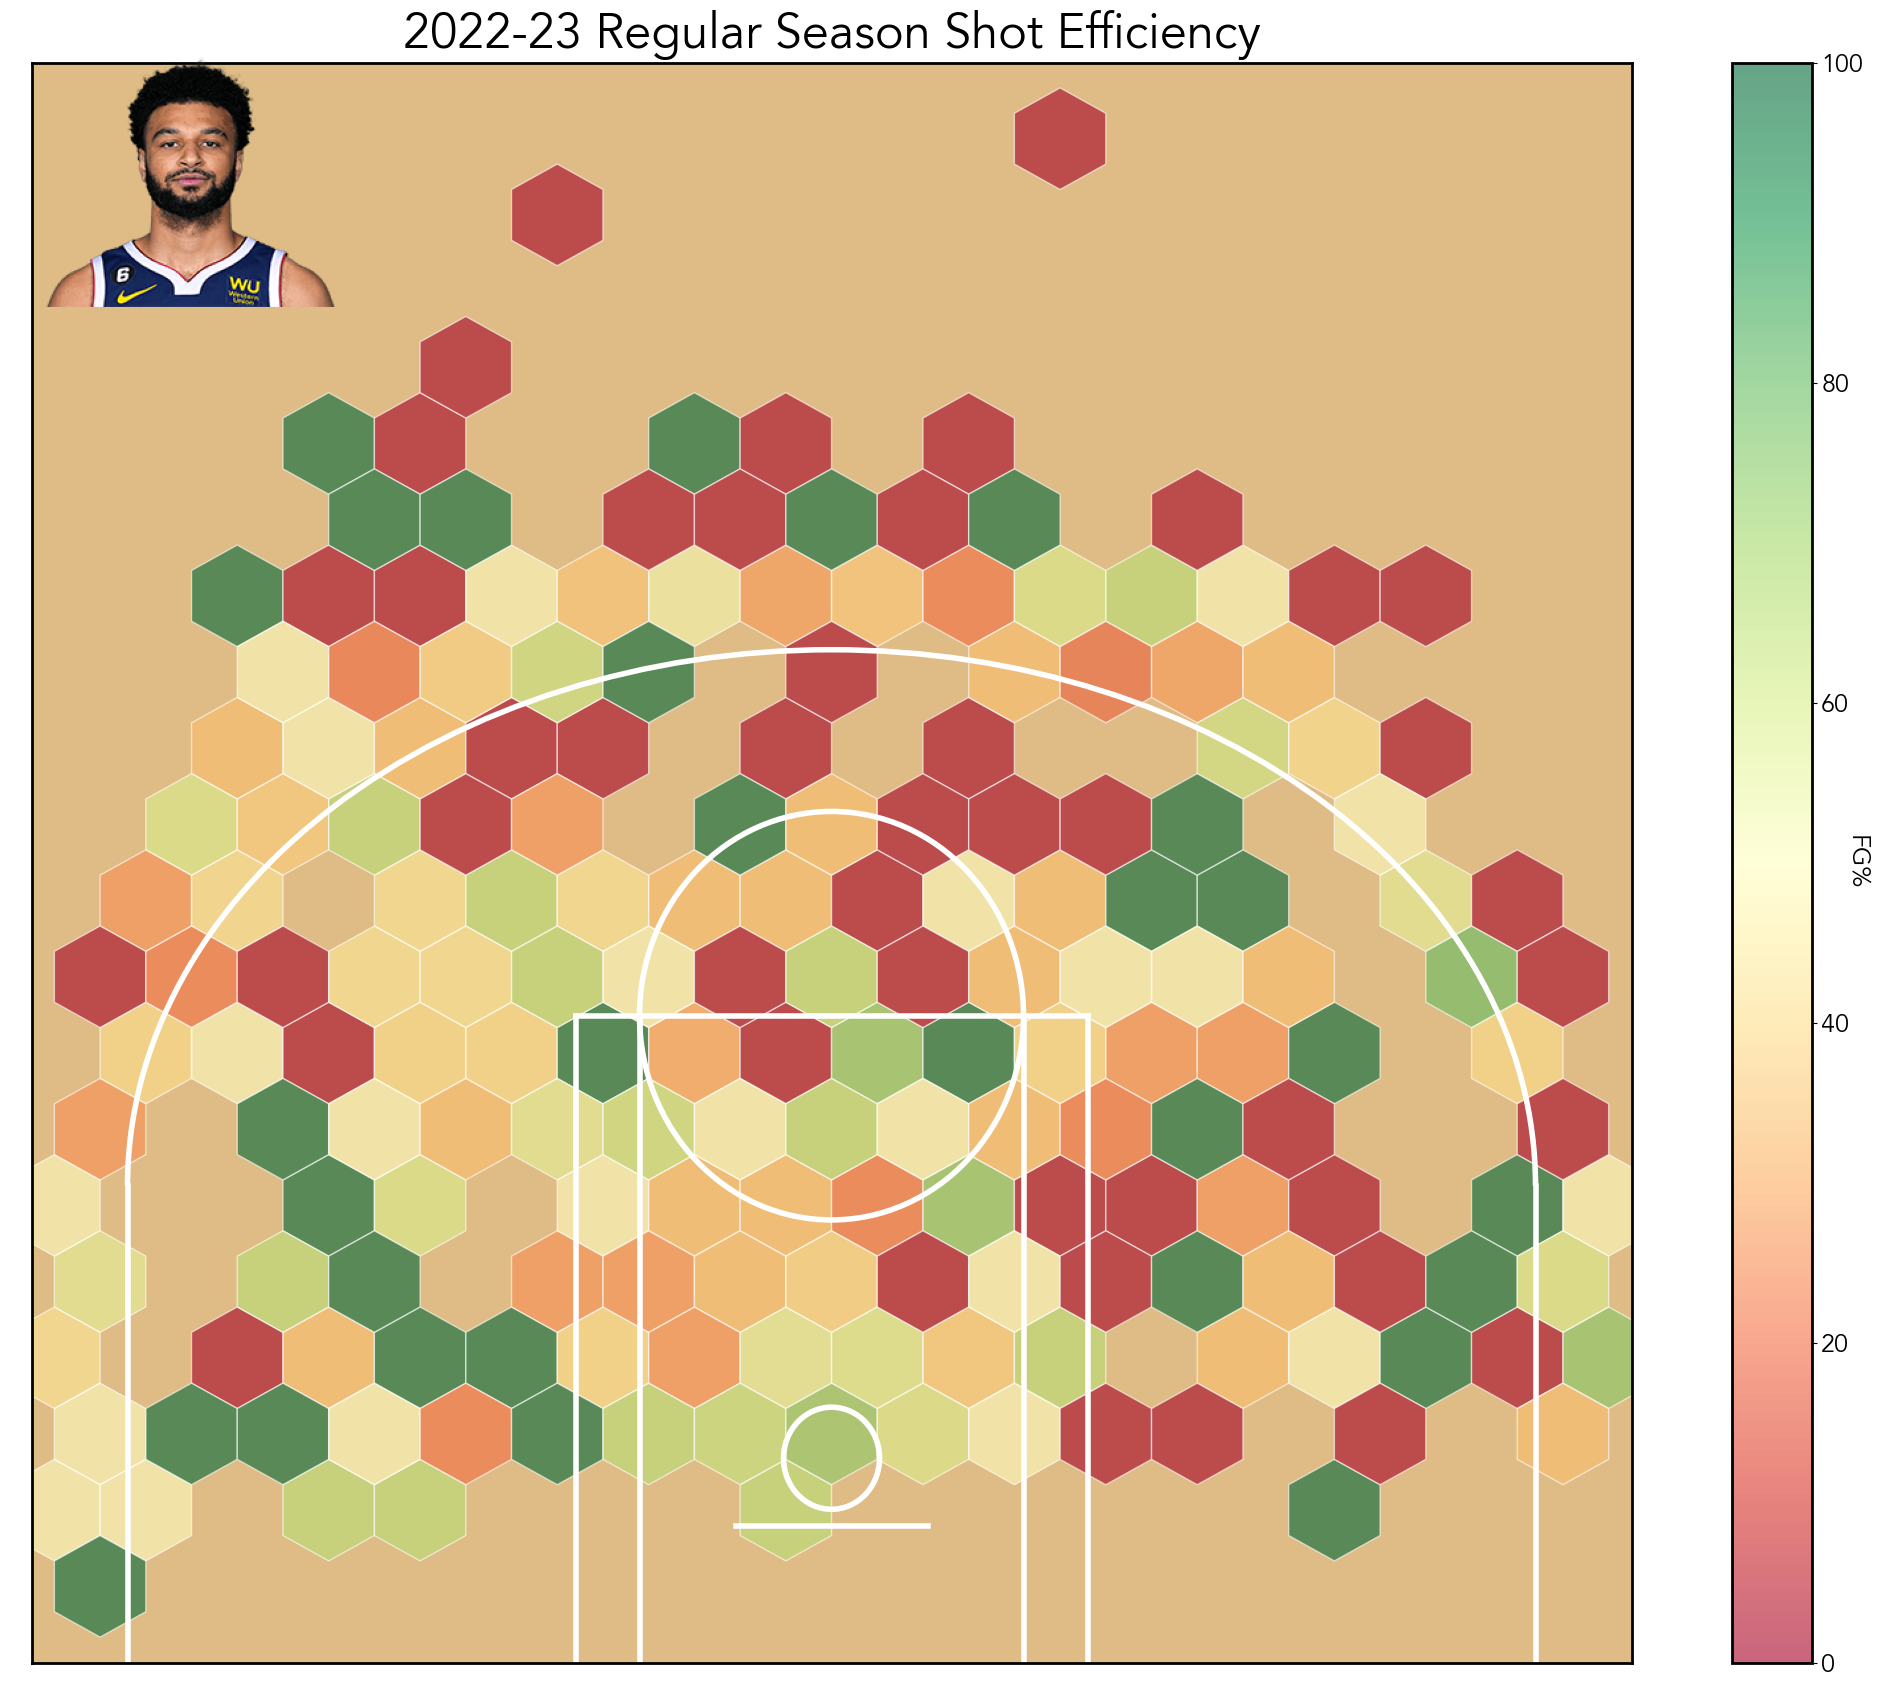

In [352]:
# Draw basketball court
fig = plt.figure(figsize=(20, 16))
ax = fig.add_axes([0, 0, 1, 1])

shot_color = {0 : 'r', 1 : 'g'}
shot_label = {0 : 'Miss', 1 : 'Made'}


shot_json = shotchartdetail.ShotChartDetail(
            team_id = team_id,
            player_id = player_id,
            context_measure_simple = 'FGA',
            season_nullable = '2022-23',
            season_type_all_star = 'Regular Season')

time.sleep(0.5)

data = shot_json.get_data_frames()[0]

alpha = 0.5

# ax.hexbin(jamal_data_made['LOC_X'], jamal_data_made['LOC_Y'] + 60, gridsize=(30, 30), extent=(-300, 300, 0, 940), bins='log', cmap='Blues', alpha=alpha)
# ax.hexbin(jamal_data_miss['LOC_X'], jamal_data_miss['LOC_Y'] + 60, gridsize=(30, 30), extent=(-300, 300, 0, 940), bins='log', cmap='Reds', alpha=alpha)

s = ax.hexbin(data['LOC_X'], data['LOC_Y'] + 60, C=data['SHOT_MADE_FLAG'] * 100, ec="white", gridsize=(21, 21), extent=(-300, 300, 0, 940), cmap='RdYlGn', alpha=0.6)

# s = ax.scatter(jamal_data['LOC_X'], jamal_data['LOC_Y'] + 60, c=jamal_data['SHOT_MADE_FLAG'], cmap='coolwarm', label=jamal_data['SHOT_MADE_FLAG'])

text_labels = ['Miss', 'Made']
# plt.legend(s.legend_elements()[0], text_labels)

cbar = plt.colorbar(s)
cbar.ax.set_ylabel('FG%', rotation=270)

zoom = 0.95
ax = create_court(ax, 'white')

ax.set_title('2022-23 Regular Season Shot Efficiency', fontsize=35)
ab_regular = AnnotationBbox(get_player_img(player_id), (-200, 435), frameon=False)
ax.add_artist(ab_regular)

plt.savefig(f'Graphs/f{player_name}_shot_chart_efficency.png', bbox_inches='tight')

plt.show()

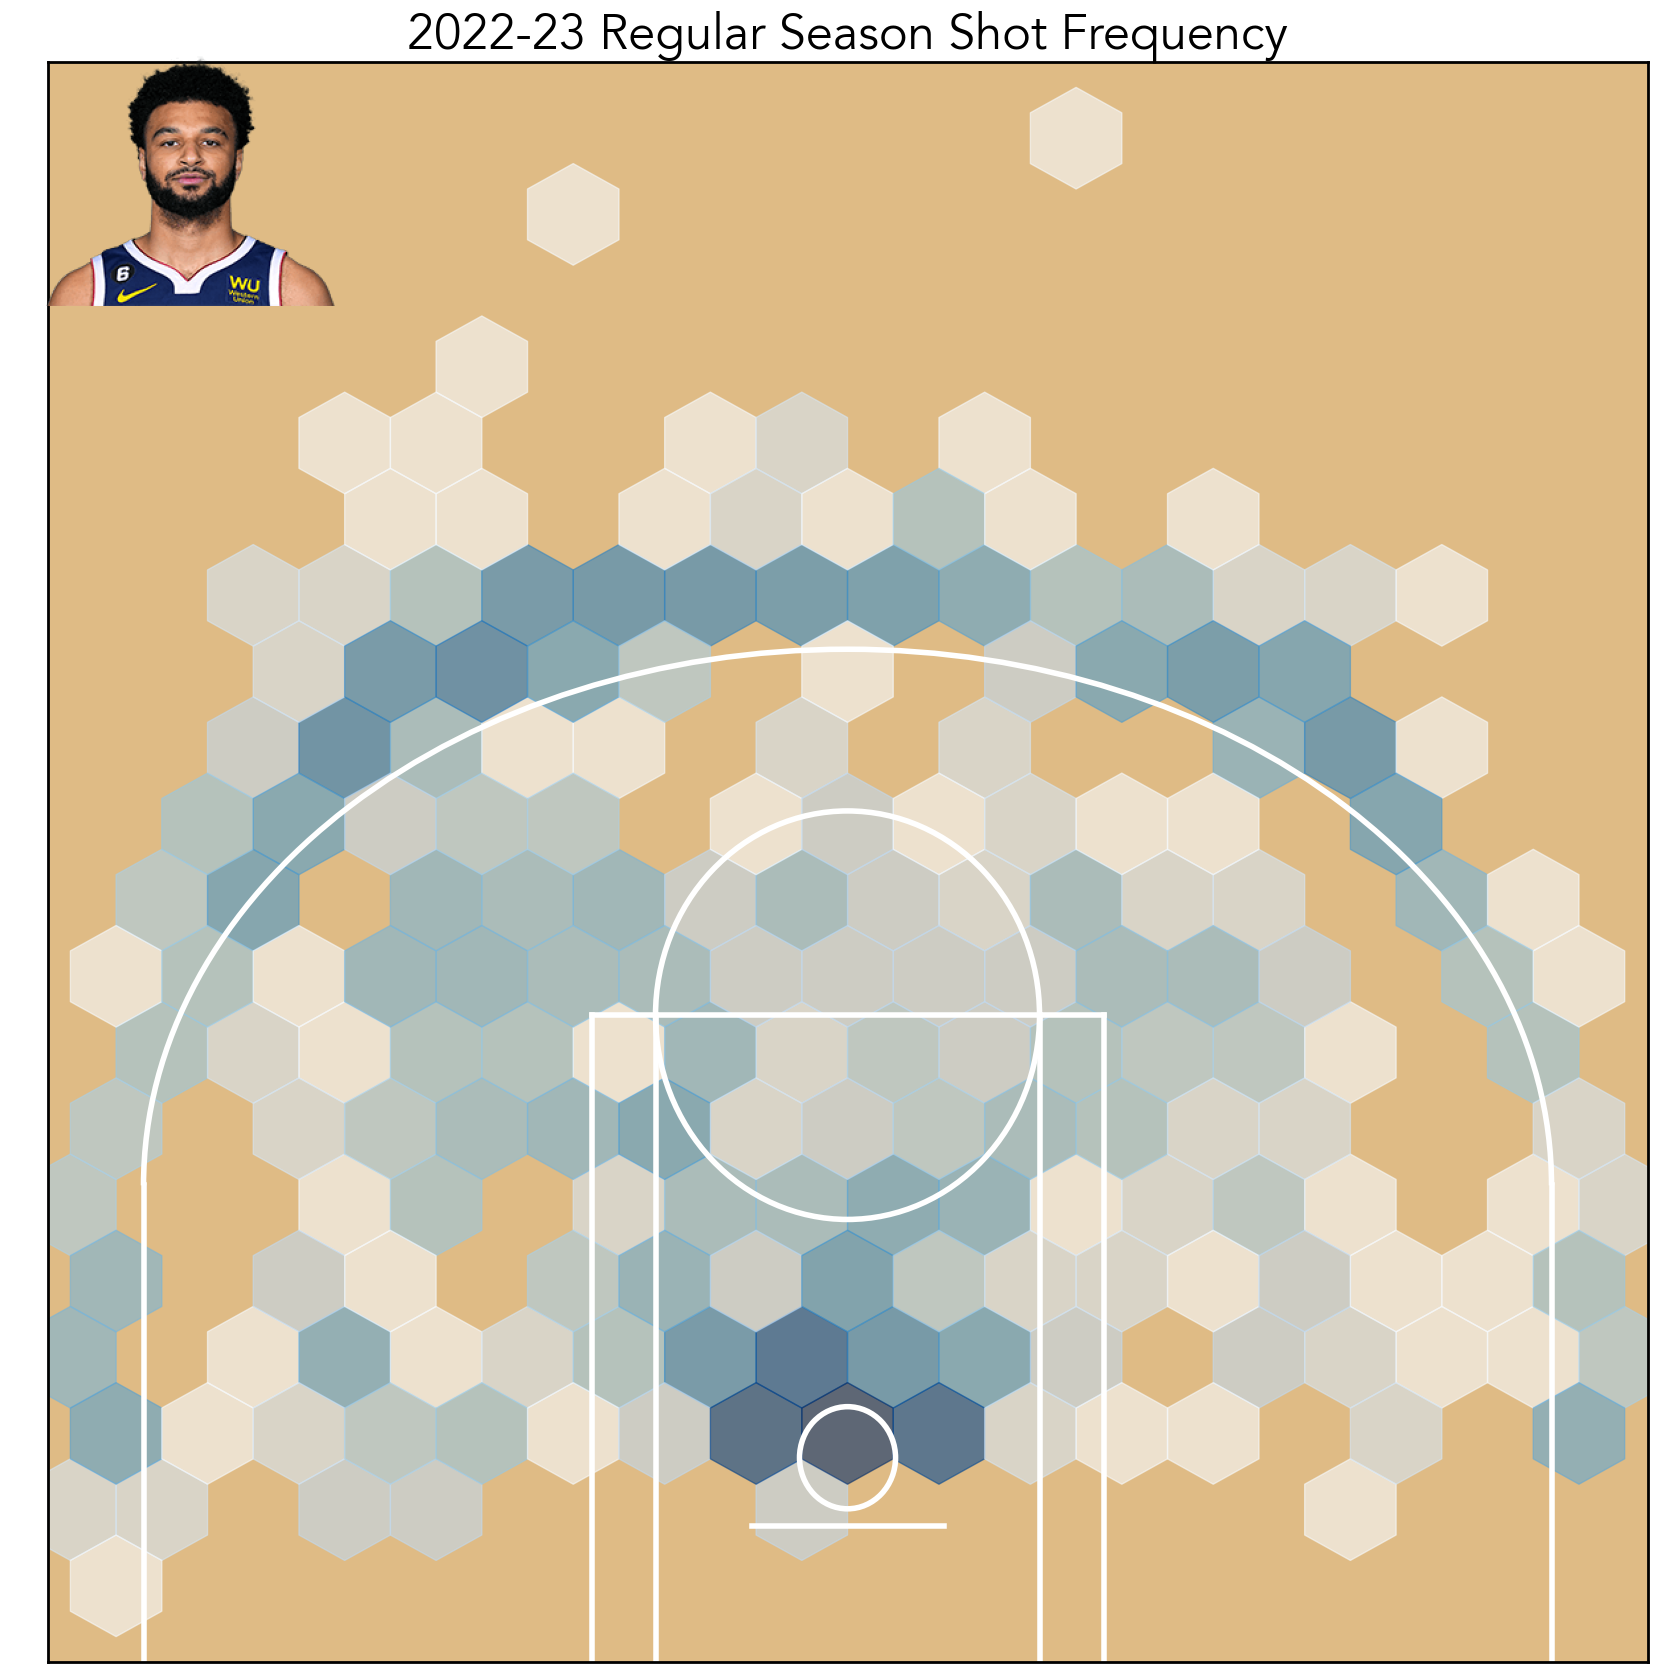

In [356]:
# Draw basketball court
fig = plt.figure(figsize=(16, 16))
ax = fig.add_axes([0, 0, 1, 1])

shot_color = {0 : 'r', 1 : 'g'}
shot_label = {0 : 'Miss', 1 : 'Made'}

shot_json = shotchartdetail.ShotChartDetail(
            team_id = team_id,
            player_id = player_id,
            context_measure_simple = 'FGA',
            season_nullable = '2022-23',
            season_type_all_star = 'Regular Season')

time.sleep(0.5)

data = shot_json.get_data_frames()[0]

s = ax.hexbin(data['LOC_X'], data['LOC_Y'] + 60, gridsize=(21, 21), bins='log', extent=(-300, 300, 0, 940), cmap='Blues', alpha=0.6)


# s = ax.scatter(jamal_data['LOC_X'], jamal_data['LOC_Y'] + 60, c=jamal_data['SHOT_MADE_FLAG'], cmap='coolwarm', label=jamal_data['SHOT_MADE_FLAG'])

# text_labels = ['Miss', 'Made']
# plt.legend(s.legend_elements()[0], text_labels)

zoom = 0.95
ax = create_court(ax, 'white')
# cbar = plt.colorbar(s)
# cbar.ax.set_ylabel('Shots Per Game', rotation=270)

ax.set_title('2022-23 Regular Season Shot Frequency', fontsize=35)
ab_regular = AnnotationBbox(get_player_img(player_id), (-205, 435), frameon=False)
ax.add_artist(ab_regular)

plt.savefig(f'Graphs/f{player_name}_shot_chart_frequency.png', bbox_inches='tight')

plt.show()